## Imports necessarios

In [1]:
import pandas as pd
import numpy as np
import random
from ag import alg_genetico
from pso import alg_pso
from aco import alg_aco

## Leitura e tratamento dos dados

In [2]:
nba = pd.read_csv("data/NBA_Dataset.csv")

In [3]:
nba = nba.fillna(0)

In [4]:
def expand_positions(df):
    new_rows = []  
    for index, row in df.iterrows():
        positions = row['pos'].split('-')
        for pos in positions:
            new_row = row.copy()
            new_row['pos'] = pos
            new_rows.append(new_row)
    return pd.DataFrame(new_rows)

mask = nba['pos'].str.contains('-')  
expanded_rows = expand_positions(nba[mask])
single_position_rows = nba[~mask]  

nba_new = pd.concat([single_position_rows, expanded_rows]).reset_index(drop=True)

In [5]:
nba_PF = nba_new[nba_new["pos"] == "PF"]
nba_SG = nba_new[nba_new["pos"] == "SG"]
nba_C = nba_new[nba_new["pos"] == "C"]
nba_PG = nba_new[nba_new["pos"] == "PG"]
nba_SF = nba_new[nba_new["pos"] == "SF"]

In [6]:
candidatos_PF = nba_PF[nba_PF["award_share"] > 0]
candidatos_SG = nba_SG[nba_SG["award_share"] > 0]
candidatos_C = nba_C[nba_C["award_share"] > 0]
candidatos_PG = nba_PG[nba_PG["award_share"] > 0]
candidatos_SF = nba_SF[nba_SF["award_share"] > 0]

## PFs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [7]:
correlations_PF = candidatos_PF.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [8]:
print("melhor combinacao:\n", correlations_PF.head(11)[1:])

melhor combinacao:
 bpm             0.624955
vorp            0.620328
ws_per_48       0.619663
per             0.601075
ws              0.567939
obpm            0.530586
dbpm            0.496430
ast_pct         0.481062
ows             0.469908
win_loss_pct    0.413538
Name: award_share, dtype: float64


In [9]:
melhor_resultado_PF = correlations_PF.head(11)[1:].sum()
print(melhor_resultado_PF)

5.425483164079248


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 17.57838249206543
Melhor aptidão: 4.630841302229389
Melhores atributos:
['bpm', 'vorp', 'per', 'obpm', 'dbpm', 'ast_pct', 'ast_per_g', 'fg_per_g', 'fta_per_g', 'mp_per_g']
Geração: 29


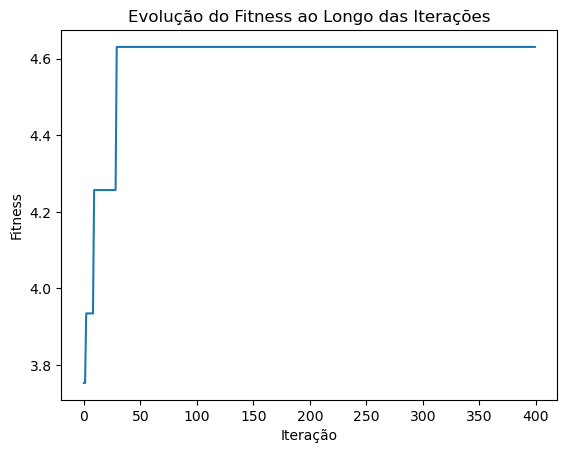

Acuracia: 0.8535352819614331


In [10]:
combinacao, resultado_atual = alg_aco(candidatos_PF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 34.28965449333191
Melhor aptidão: 4.677529561523394
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'obpm', 'ast_pct', 'ast_per_g', 'usg_pct', 'pts_per_g', 'ft_per_g', 'fga_per_g']
Geração: 1


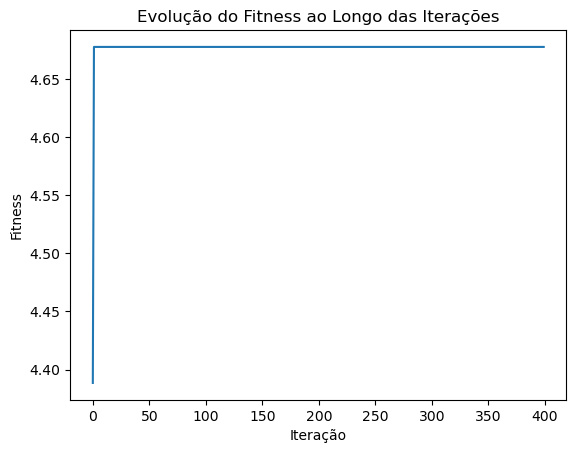

Acuracia: 0.8621406462915846


In [11]:
combinacao, resultado_atual = alg_pso(candidatos_PF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 55.40174627304077
Melhor aptidão: 5.424315402284341
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'usg_pct']
Geração: 339


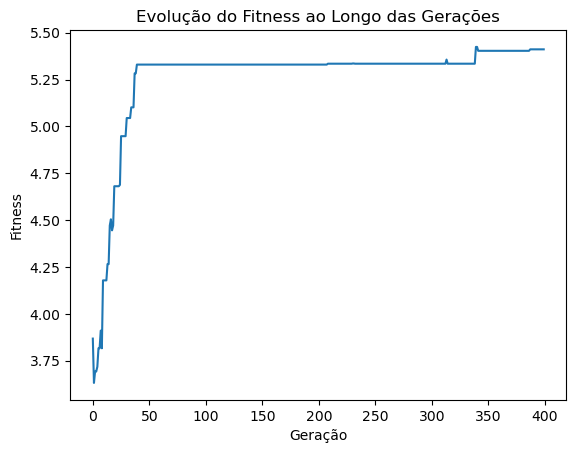

Acuracia: 0.9997847635391004


In [12]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 24.858572721481323
Melhor aptidão: 5.425483164079248
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'win_loss_pct']
Geração: 162


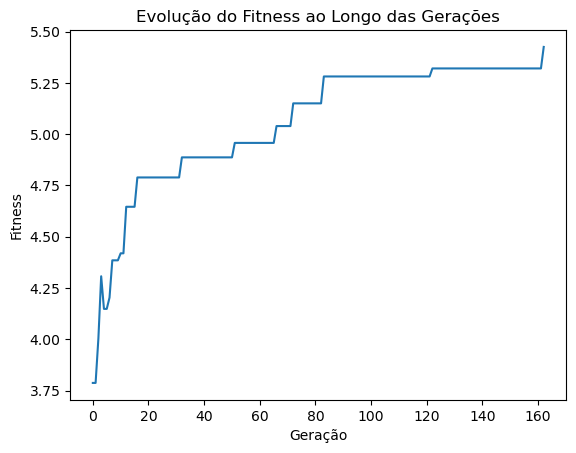

Acuracia: 1.0


In [13]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 32.18308615684509
Melhor aptidão: 5.425483164079248
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'win_loss_pct']
Geração: 216


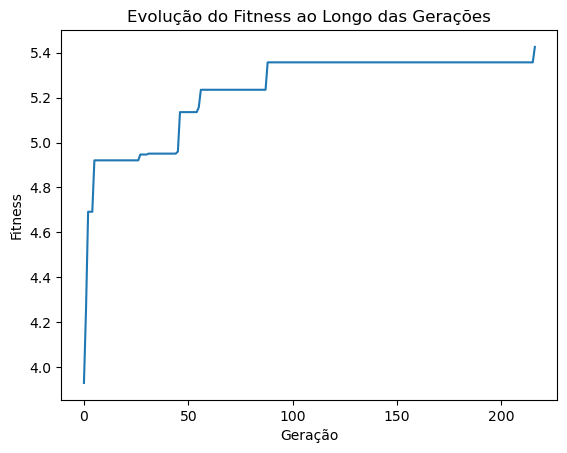

Acuracia: 1.0


In [14]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 57.58427953720093
Melhor aptidão: 5.411386300948082
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'usg_pct']
Geração: 268


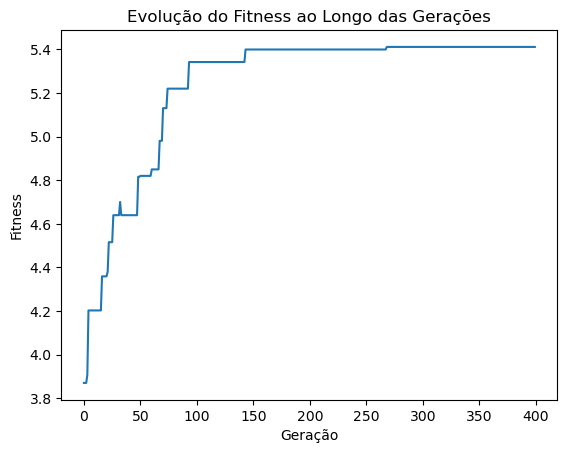

Acuracia: 0.9974017312919709


In [15]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 59.391028881073
Melhor aptidão: 5.411386300948082
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'usg_pct']
Geração: 341


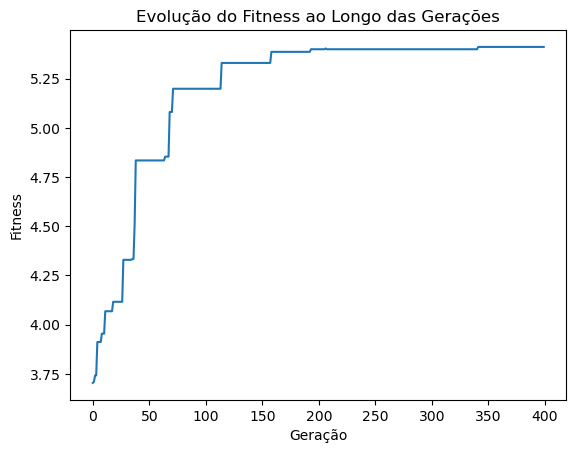

Acuracia: 0.9974017312919709


In [16]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 45.269729137420654
Melhor aptidão: 5.425483164079248
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'win_loss_pct']
Geração: 304


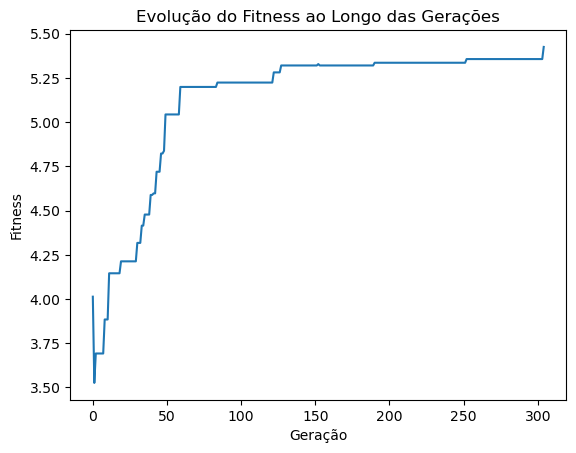

Acuracia: 1.0


In [17]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

Tempo de execução: 27.38620615005493
Melhor aptidão: 5.425483164079248
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'win_loss_pct']
Geração: 191


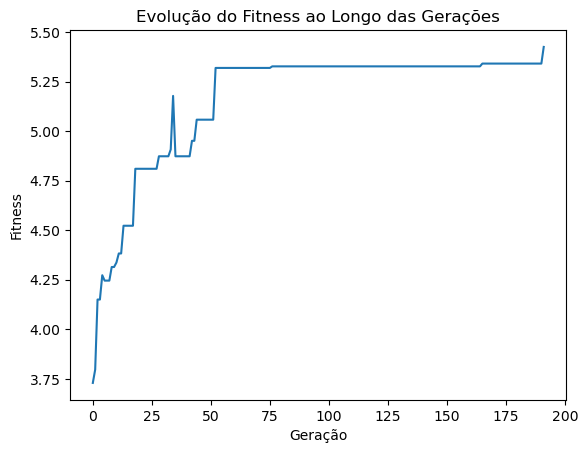

Acuracia: 1.0


In [18]:
combinacao, resultado_atual = alg_genetico(candidatos_PF, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_PF)
print("Acuracia:", (resultado_atual/melhor_resultado_PF))

## SGs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [19]:
correlations_SG = candidatos_SG.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [20]:
print("melhor combinacao:\n", correlations_SG.head(11)[1:])

melhor combinacao:
 ws           0.719753
vorp         0.711065
ws_per_48    0.682965
bpm          0.662147
per          0.661434
obpm         0.652299
ows          0.644641
fg_per_g     0.625268
pts_per_g    0.623711
dws          0.546214
Name: award_share, dtype: float64


In [21]:
melhor_resultado_SG = correlations_SG.head(11)[1:].sum()
print(melhor_resultado_SG)

6.529496666824663


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 17.063682556152344
Melhor aptidão: 5.669449143903075
Melhores atributos:
['ws', 'vorp', 'per', 'obpm', 'ows', 'fg_per_g', 'dws', 'fta_per_g', 'mov', 'gs']
Geração: 293


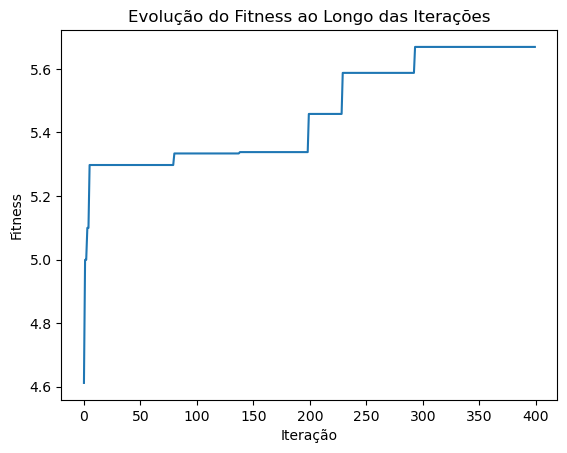

Acuracia: 0.8682827227263393


In [22]:
combinacao, resultado_atual = alg_aco(candidatos_SG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 34.026384592056274
Melhor aptidão: 5.716428544067028
Melhores atributos:
['ws_per_48', 'per', 'obpm', 'ows', 'fg_per_g', 'pts_per_g', 'dws', 'usg_pct', 'fg2a_per_g', 'win_loss_pct']
Geração: 5


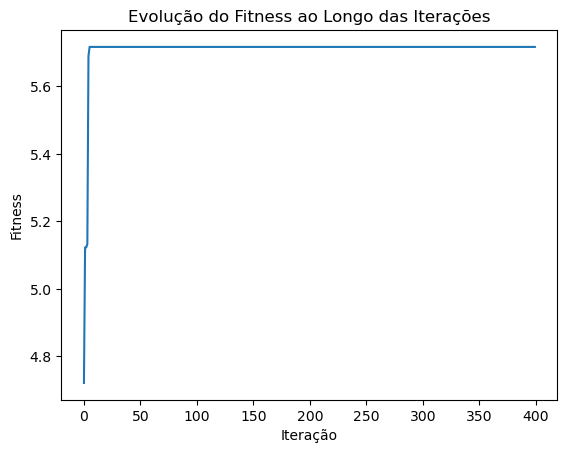

Acuracia: 0.8754776724385657


In [23]:
combinacao, resultado_atual = alg_pso(candidatos_SG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 57.38027238845825
Melhor aptidão: 6.502392936437808
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'dws', 'fg2_per_g']
Geração: 159


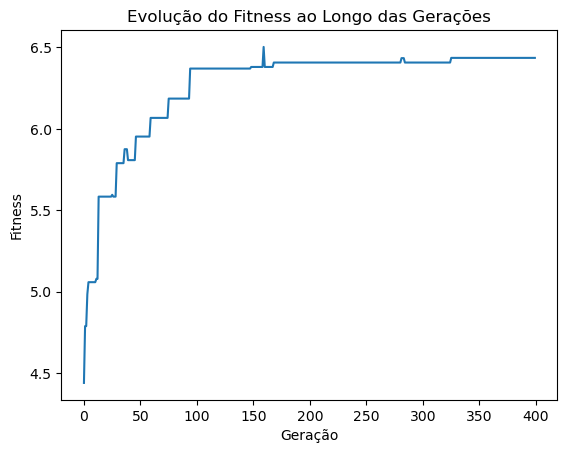

Acuracia: 0.9958490322041873


In [24]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 57.46908235549927
Melhor aptidão: 6.512620909980574
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'fg2_per_g', 'fga_per_g']
Geração: 222


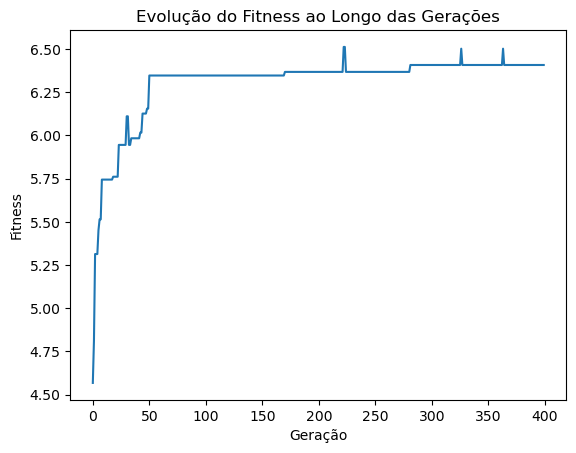

Acuracia: 0.9974154582343487


In [25]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 56.87257790565491
Melhor aptidão: 6.52949666682466
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'pts_per_g', 'dws']
Geração: 368


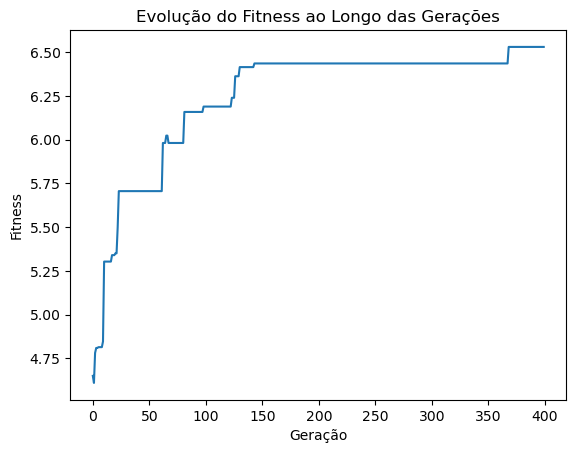

Acuracia: 0.9999999999999996


In [26]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 63.36203408241272
Melhor aptidão: 6.52949666682466
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'pts_per_g', 'usg_pct']
Geração: 248


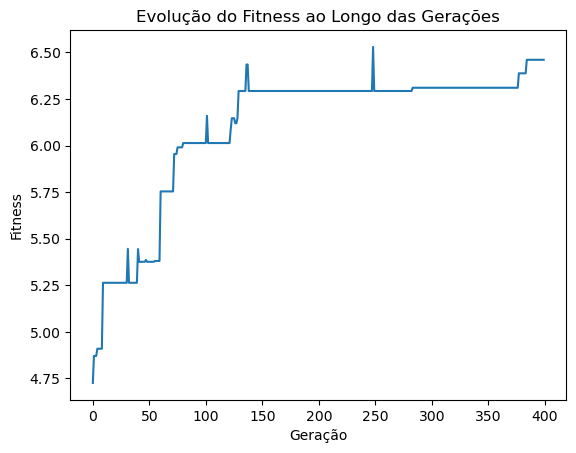

Acuracia: 0.9999999999999996


In [27]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 60.28060507774353
Melhor aptidão: 6.462366010588663
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'pts_per_g', 'ft_per_g']
Geração: 334


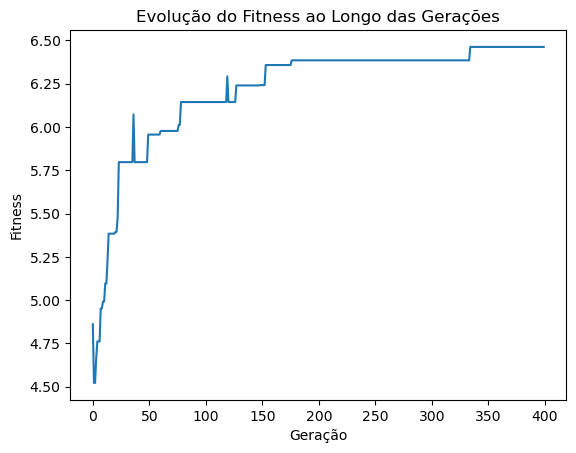

Acuracia: 0.9897188620101331


In [28]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 57.86953330039978
Melhor aptidão: 6.502392936437808
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'pts_per_g', 'fga_per_g']
Geração: 124


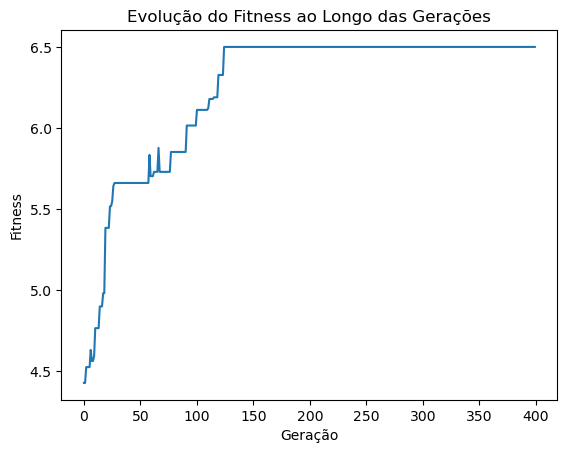

Acuracia: 0.9958490322041873


In [29]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

Tempo de execução: 62.01932692527771
Melhor aptidão: 6.52949666682466
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'bpm', 'per', 'obpm', 'ows', 'fg_per_g', 'dws', 'fg2_per_g']
Geração: 317


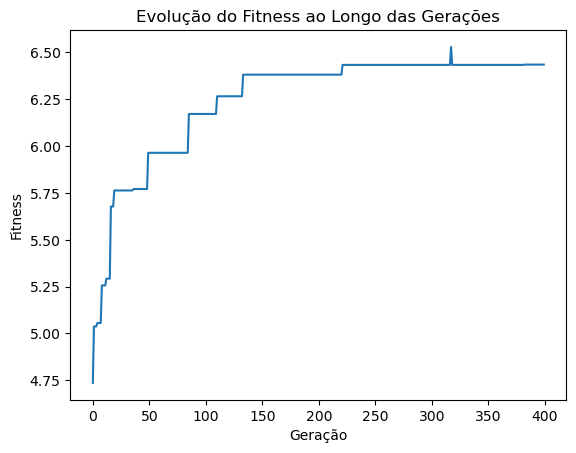

Acuracia: 0.9999999999999996


In [30]:
combinacao, resultado_atual = alg_genetico(candidatos_SG, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_SG)
print("Acuracia:", (resultado_atual/melhor_resultado_SG))

## Cs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [31]:
correlations_C = candidatos_C.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [32]:
print("melhor combinacao:\n", correlations_C.head(11)[1:])

melhor combinacao:
 vorp         0.650887
bpm          0.616089
per          0.607019
ws           0.606898
ws_per_48    0.592144
obpm         0.589435
ows          0.522262
pts_per_g    0.513627
fg_per_g     0.478715
fg2_per_g    0.448819
Name: award_share, dtype: float64


In [33]:
melhor_resultado_C = correlations_C.head(11)[1:].sum()
print(melhor_resultado_C)

5.625894890623558


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 19.08791422843933
Melhor aptidão: 4.830897985204085
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'fg_per_g', 'fg2_per_g', 'tov_per_g', 'drb_per_g', 'mov_adj']
Geração: 279


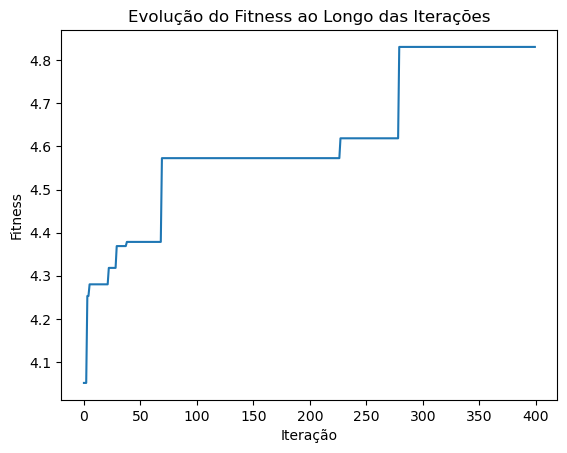

Acuracia: 0.8586896981057253


In [34]:
combinacao, resultado_atual = alg_aco(candidatos_C, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 35.11522030830383
Melhor aptidão: 5.318981032094015
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'usg_pct', 'trb_per_g']
Geração: 7


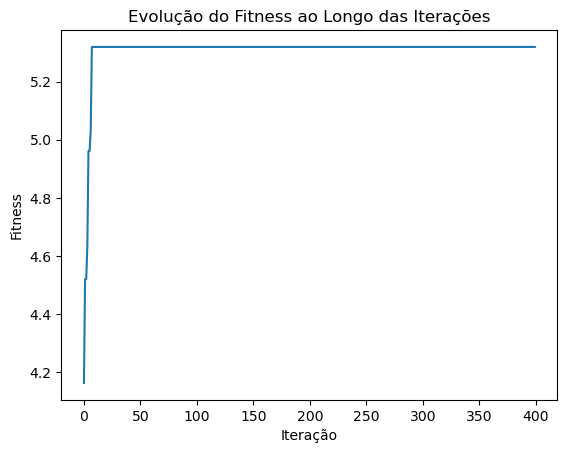

Acuracia: 0.9454462153139294


In [35]:
combinacao, resultado_atual = alg_pso(candidatos_C, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 68.73951315879822
Melhor aptidão: 5.619930306787587
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 161


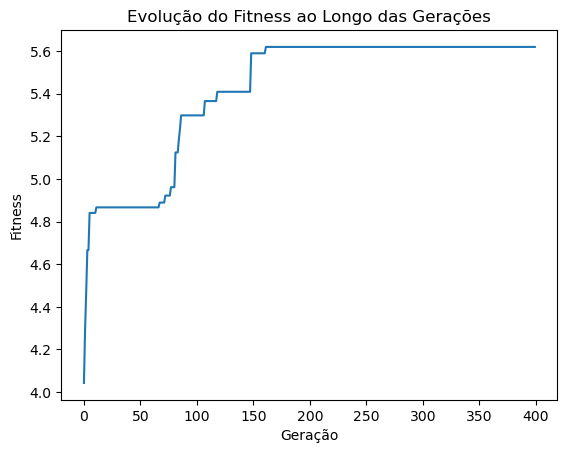

Acuracia: 0.9989397982095415


In [36]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 60.94230270385742
Melhor aptidão: 5.625894890623556
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 367


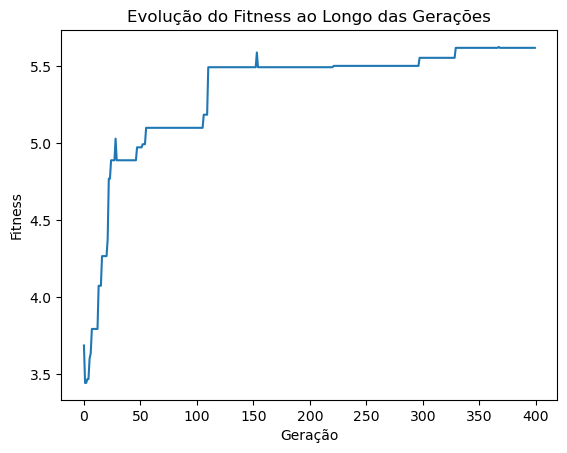

Acuracia: 0.9999999999999997


In [37]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 57.57466387748718
Melhor aptidão: 5.625894890623556
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fg2_per_g']
Geração: 144


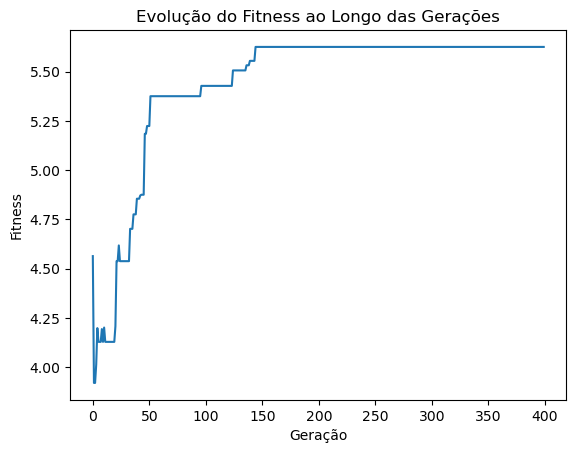

Acuracia: 0.9999999999999997


In [38]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 57.455540895462036
Melhor aptidão: 5.5900345518767764
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'fg_per_g', 'fg2_per_g', 'fta_per_g']
Geração: 366


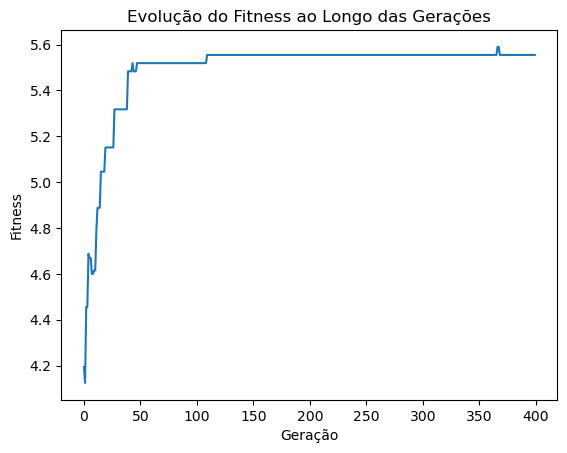

Acuracia: 0.993625842742539


In [39]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 58.22203063964844
Melhor aptidão: 5.625894890623556
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fg2_per_g']
Geração: 308


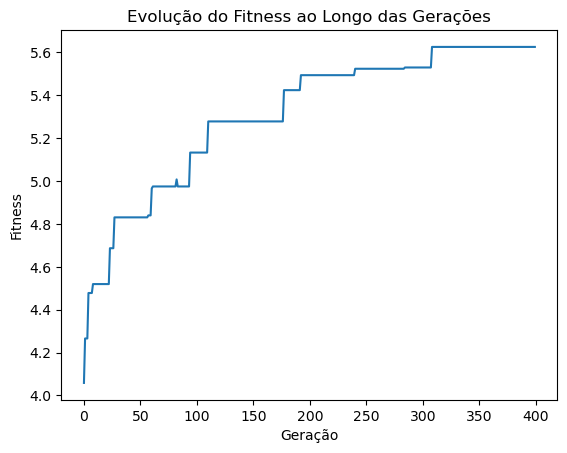

Acuracia: 0.9999999999999997


In [40]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 59.46556615829468
Melhor aptidão: 5.625894890623556
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fg2_per_g']
Geração: 384


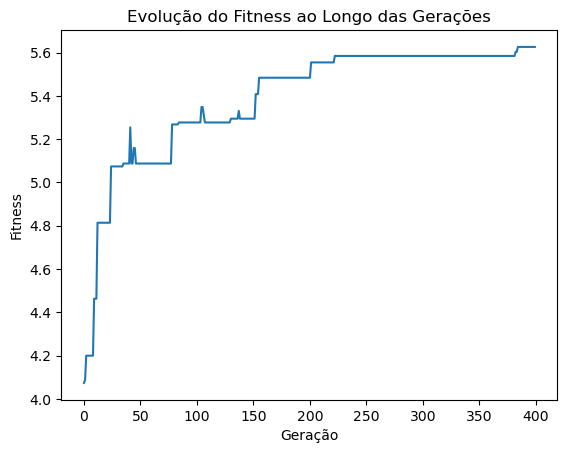

Acuracia: 0.9999999999999997


In [41]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

Tempo de execução: 58.74423956871033
Melhor aptidão: 5.625894890623556
Melhores atributos:
['vorp', 'bpm', 'per', 'ws', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fg2_per_g']
Geração: 188


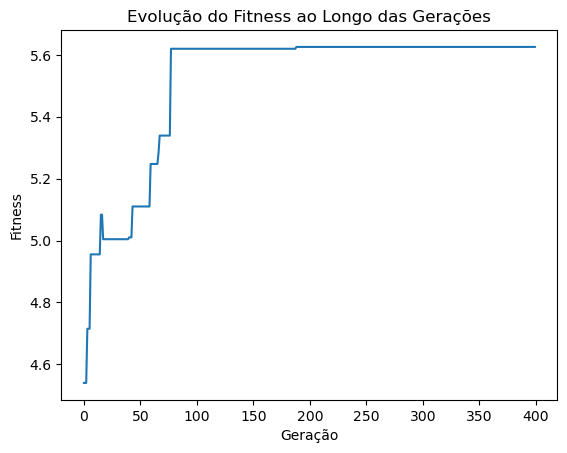

Acuracia: 0.9999999999999997


In [42]:
combinacao, resultado_atual = alg_genetico(candidatos_C, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_C)
print("Acuracia:", (resultado_atual/melhor_resultado_C))

## PGs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [43]:
correlations_PG = candidatos_PG.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [44]:
print("melhor combinacao:\n", correlations_PG.head(11)[1:])

melhor combinacao:
 per             0.527255
vorp            0.523805
bpm             0.514576
obpm            0.513849
ws              0.489059
ws_per_48       0.477846
ows             0.451950
trb_pct         0.335277
drb_per_g       0.334537
win_loss_pct    0.329759
Name: award_share, dtype: float64


In [45]:
melhor_resultado_PG = correlations_PG.head(11)[1:].sum()
print(melhor_resultado_PG)

4.497914900112759


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 17.006834983825684
Melhor aptidão: 3.921614769027637
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws_per_48', 'drb_pct', 'mov', 'mov_adj', 'ast_pct', 'efg_pct']
Geração: 202


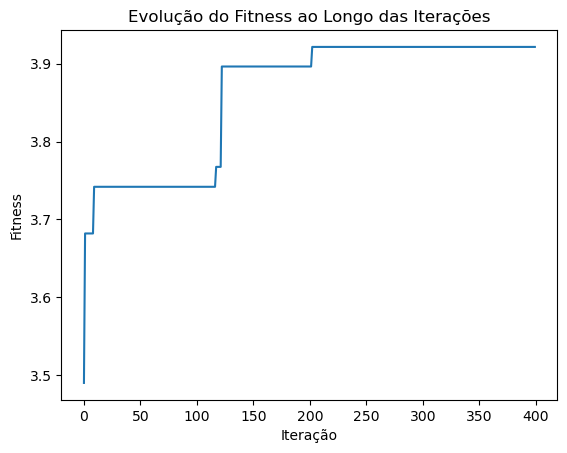

Acuracia: 0.8718739362830821


In [46]:
combinacao, resultado_atual = alg_aco(candidatos_PG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 37.27400994300842
Melhor aptidão: 4.064878718799576
Melhores atributos:
['per', 'bpm', 'obpm', 'ws', 'ws_per_48', 'trb_pct', 'win_loss_pct', 'trb_per_g', 'ts_pct', 'fta_per_g']
Geração: 2


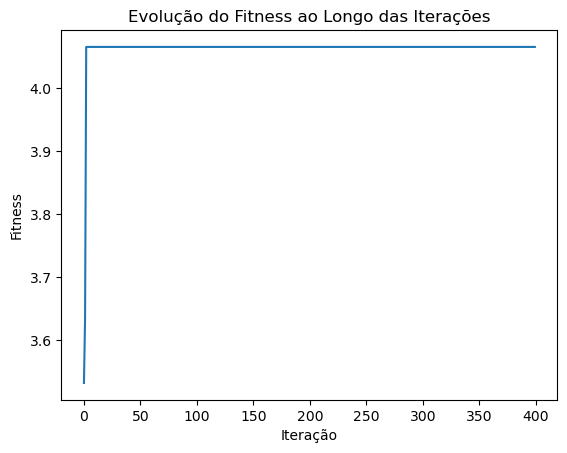

Acuracia: 0.9037251279915661


In [47]:
combinacao, resultado_atual = alg_pso(candidatos_PG, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 38.94915294647217
Melhor aptidão: 4.497914900112759
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'trb_pct', 'drb_per_g', 'win_loss_pct']
Geração: 248


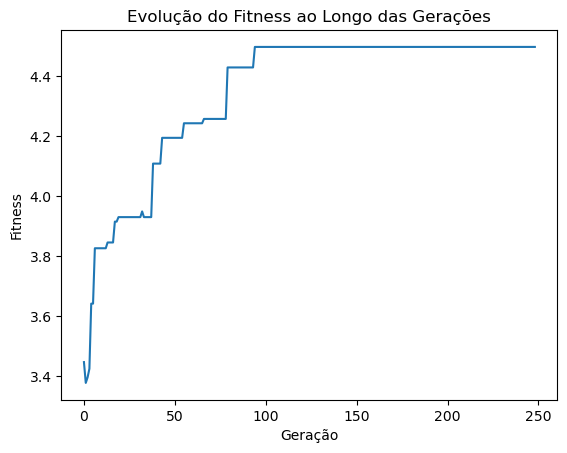

Acuracia: 1.0


In [48]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 61.26081562042236
Melhor aptidão: 4.492357754334707
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'drb_per_g', 'win_loss_pct', 'trb_per_g']
Geração: 151


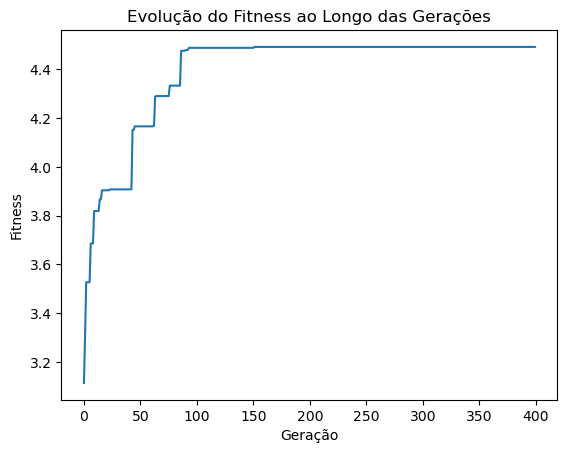

Acuracia: 0.9987645062431232


In [49]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 66.36751818656921
Melhor aptidão: 4.497875345773624
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'trb_pct', 'drb_per_g', 'trb_per_g']
Geração: 225


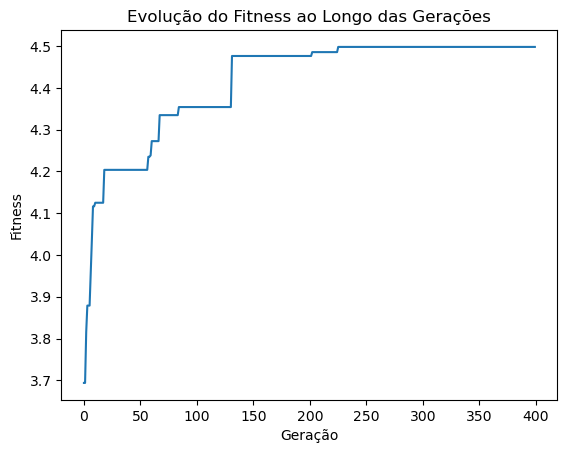

Acuracia: 0.9999912060721436


In [50]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 53.07648587226868
Melhor aptidão: 4.497914900112759
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'trb_pct', 'drb_per_g', 'win_loss_pct']
Geração: 333


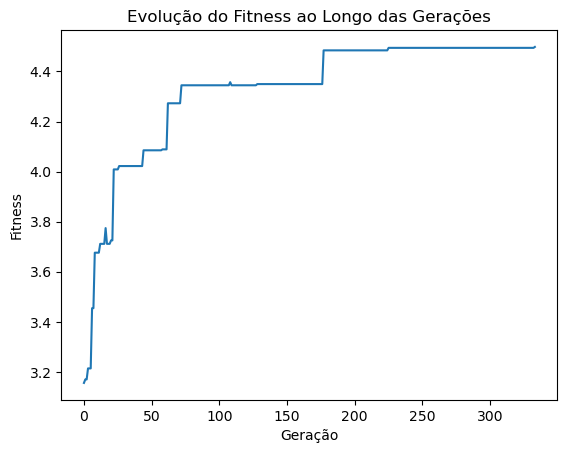

Acuracia: 1.0


In [51]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 52.134565114974976
Melhor aptidão: 4.497914900112759
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'trb_pct', 'drb_per_g', 'win_loss_pct']
Geração: 368


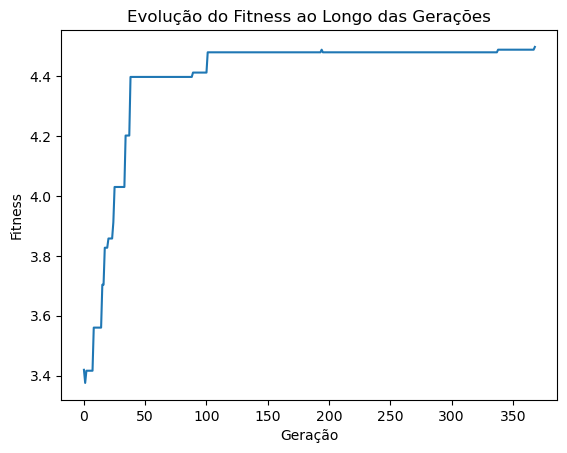

Acuracia: 1.0


In [52]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 62.76643490791321
Melhor aptidão: 4.492357754334707
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'drb_per_g', 'win_loss_pct', 'trb_per_g']
Geração: 334


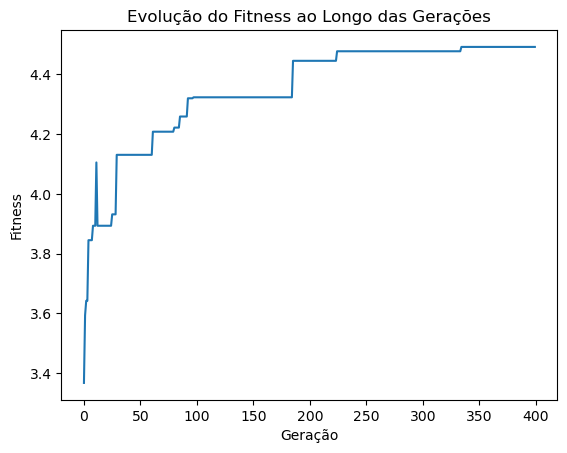

Acuracia: 0.9987645062431232


In [53]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

Tempo de execução: 62.95897197723389
Melhor aptidão: 4.446575785710134
Melhores atributos:
['per', 'vorp', 'bpm', 'obpm', 'ws', 'ws_per_48', 'ows', 'trb_pct', 'win_loss_pct', 'mov']
Geração: 351


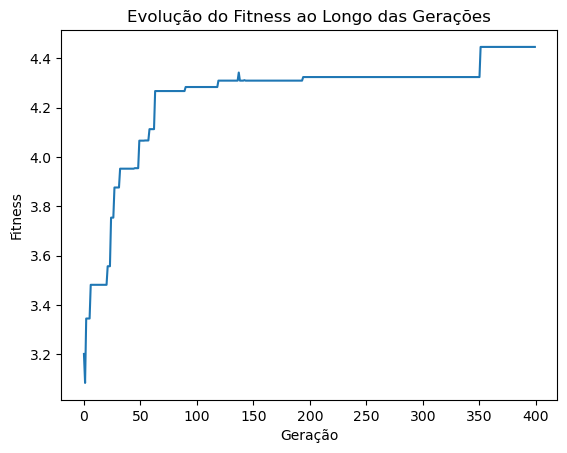

Acuracia: 0.9885860191793894


In [54]:
combinacao, resultado_atual = alg_genetico(candidatos_PG, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_PG)
print("Acuracia:", (resultado_atual/melhor_resultado_PG))

## SFs

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [55]:
correlations_SF = candidatos_SF.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [56]:
print("melhor combinacao:\n", correlations_SF.head(11)[1:])

melhor combinacao:
 ws           0.739136
vorp         0.721576
ws_per_48    0.719621
per          0.702728
bpm          0.688895
obpm         0.676634
ows          0.656256
drb_per_g    0.488515
dws          0.479844
dbpm         0.469659
Name: award_share, dtype: float64


In [57]:
melhor_resultado_SF = correlations_SF.head(11)[1:].sum()
print(melhor_resultado_SF)

6.342863384611484


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 25.582030534744263
Melhor aptidão: 5.461277482851117
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'obpm', 'dws', 'trb_per_g', 'ft_per_g', 'fta_per_g', 'stl_per_g']
Geração: 324


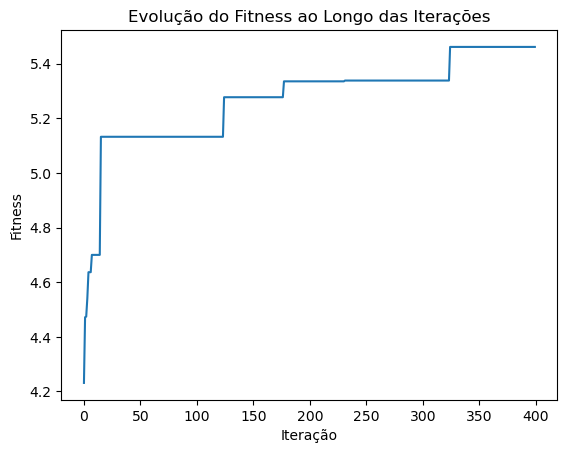

Acuracia: 0.8610113684776507


In [58]:
combinacao, resultado_atual = alg_aco(candidatos_SF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 41.394366979599
Melhor aptidão: 5.751188064088772
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'drb_pct', 'trb_per_g', 'mov_adj', 'stl_pct']
Geração: 4


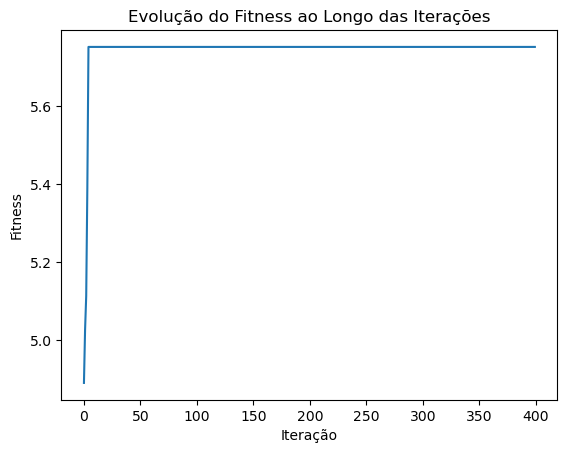

Acuracia: 0.9067179466677171


In [59]:
combinacao, resultado_atual = alg_pso(candidatos_SF, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 63.14840769767761
Melhor aptidão: 6.342863384611483
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'ows', 'drb_per_g', 'dws', 'dbpm']
Geração: 220


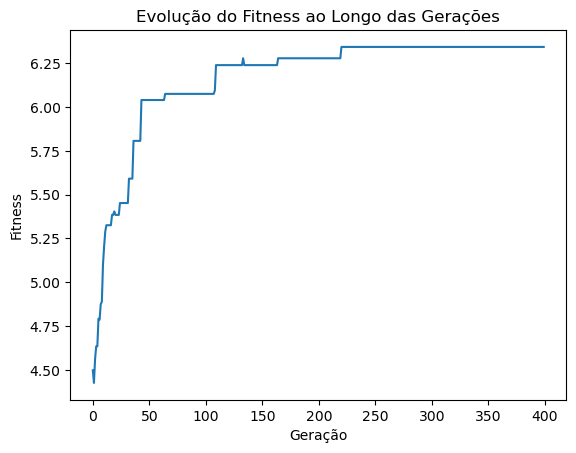

Acuracia: 0.9999999999999997


In [60]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 60.18462014198303
Melhor aptidão: 6.2939979601806835
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'ows', 'drb_per_g', 'dws', 'ts_pct']
Geração: 195


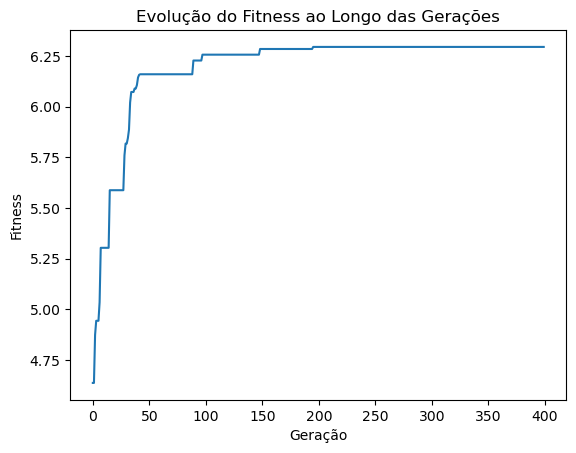

Acuracia: 0.9922959992249945


In [61]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 57.64995098114014
Melhor aptidão: 6.342863384611483
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'ows', 'drb_per_g', 'dws', 'dbpm']
Geração: 69


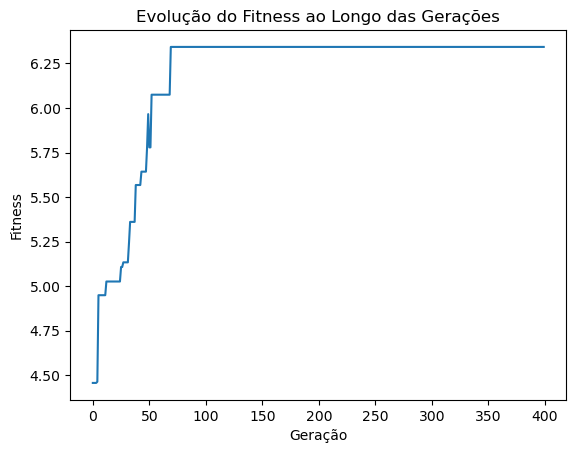

Acuracia: 0.9999999999999997


In [62]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 63.31963586807251
Melhor aptidão: 6.326619674223273
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'ows', 'drb_per_g', 'dws', 'drb_pct']
Geração: 335


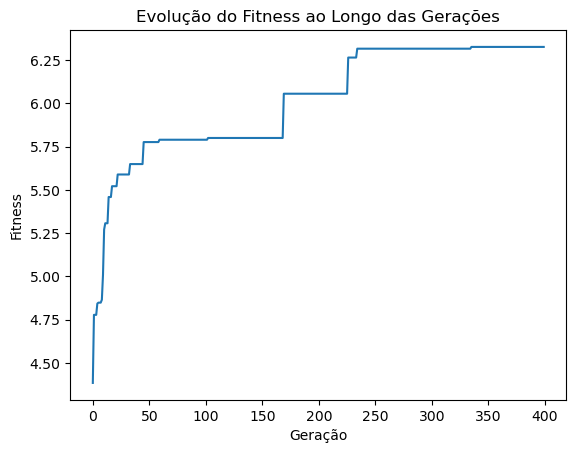

Acuracia: 0.9974390571886476


In [63]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 61.876344442367554
Melhor aptidão: 6.28140883432691
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'drb_per_g', 'dws', 'dbpm', 'trb_per_g']
Geração: 206


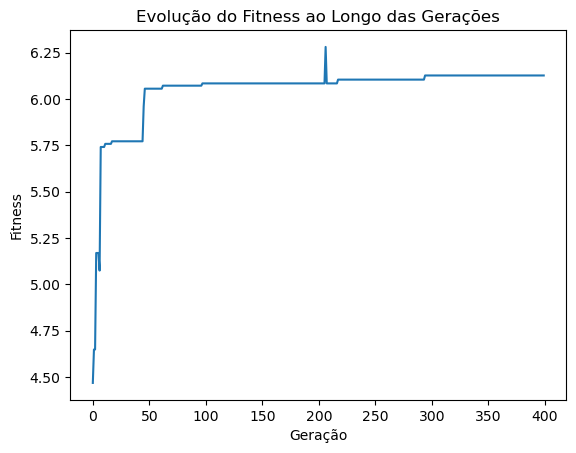

Acuracia: 0.9903112290840647


In [64]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 64.69818162918091
Melhor aptidão: 6.342863384611483
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'ows', 'drb_per_g', 'dws', 'dbpm']
Geração: 246


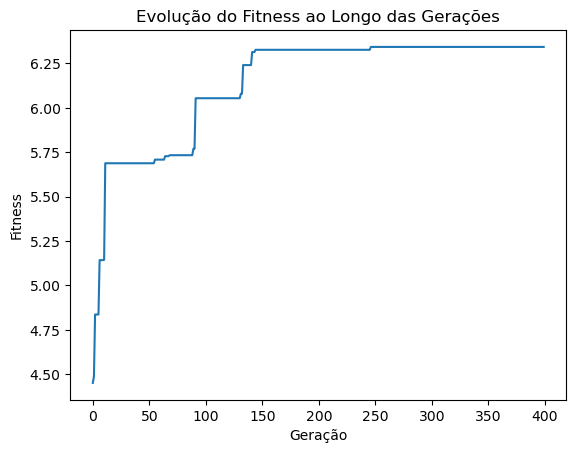

Acuracia: 0.9999999999999997


In [65]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

Tempo de execução: 63.91895818710327
Melhor aptidão: 6.342863384611483
Melhores atributos:
['ws', 'vorp', 'ws_per_48', 'per', 'bpm', 'obpm', 'ows', 'drb_per_g', 'dws', 'dbpm']
Geração: 179


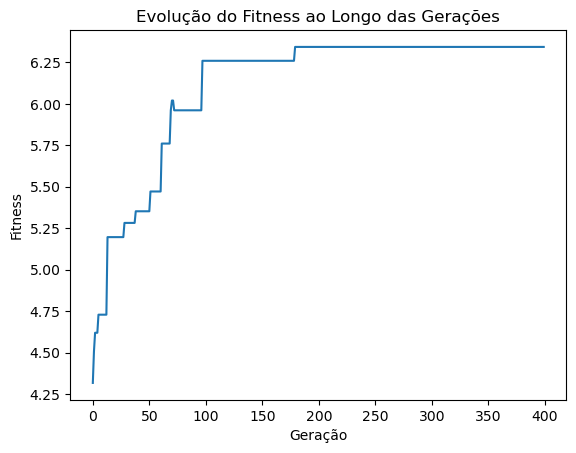

Acuracia: 0.9999999999999997


In [66]:
combinacao, resultado_atual = alg_genetico(candidatos_SF, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_SF)
print("Acuracia:", (resultado_atual/melhor_resultado_SF))

## Geral

### Calcular os melhores valores conhecidos para avaliar o desempenho das funcoes

In [67]:
candidatos_geral = nba_new[nba_new["award_share"] > 0]

In [68]:
correlations_geral = candidatos_geral.corr(numeric_only=True)['award_share'].sort_values(ascending=False)

In [69]:
print("melhor combinacao:\n", correlations_geral.head(11)[1:])

melhor combinacao:
 vorp         0.633791
ws           0.619968
per          0.613785
ws_per_48    0.609452
bpm          0.609010
obpm         0.545075
ows          0.528465
pts_per_g    0.429715
fg_per_g     0.395222
ft_per_g     0.367733
Name: award_share, dtype: float64


In [70]:
melhor_resultado_geral = correlations_geral.head(11)[1:].sum()
print(melhor_resultado_geral)

5.352216092317167


### Outros Algoritmos, para fins de comparacao

Tempo de execução: 18.221534729003906
Melhor aptidão: 4.554814509528568
Melhores atributos:
['vorp', 'ws', 'per', 'bpm', 'obpm', 'ows', 'mov', 'fga_per_g', 'drb_per_g', 'blk_per_g']
Geração: 117


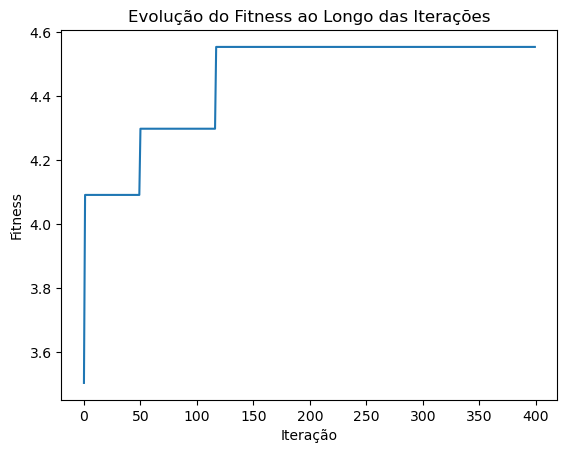

Acuracia: 0.851014688302061


In [71]:
combinacao, resultado_atual = alg_aco(candidatos_geral, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 34.95000457763672
Melhor aptidão: 4.370680472440388
Melhores atributos:
['vorp', 'ws', 'bpm', 'obpm', 'ows', 'ft_per_g', 'dws', 'ts_pct', 'drb_per_g', 'fg2_pct']
Geração: 1


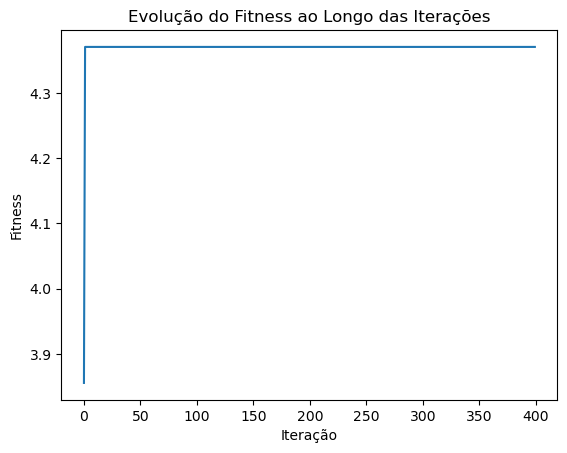

Acuracia: 0.8166113619205841


In [72]:
combinacao, resultado_atual = alg_pso(candidatos_geral, plot_details=True)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

### Algoritmo genetico variando o numero de pontos de crossover

Tempo de execução: 60.43791437149048
Melhor aptidão: 5.318171814970231
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'bpm', 'obpm', 'pts_per_g', 'fg_per_g', 'ft_per_g', 'usg_pct']
Geração: 360


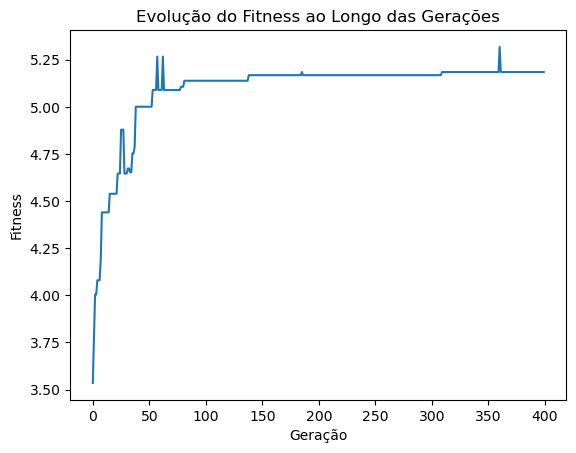

Acuracia: 0.9936392184546128


In [73]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 66.27952456474304
Melhor aptidão: 5.352216092317168
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'bpm', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'ft_per_g']
Geração: 212


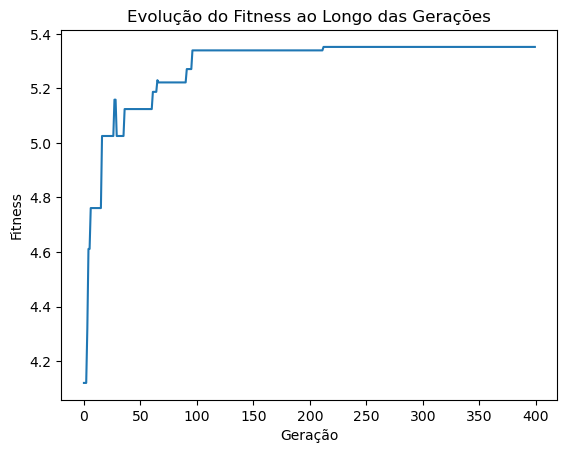

Acuracia: 1.0000000000000002


In [74]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=2, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 68.30359315872192
Melhor aptidão: 5.3500141911840355
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'bpm', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 259


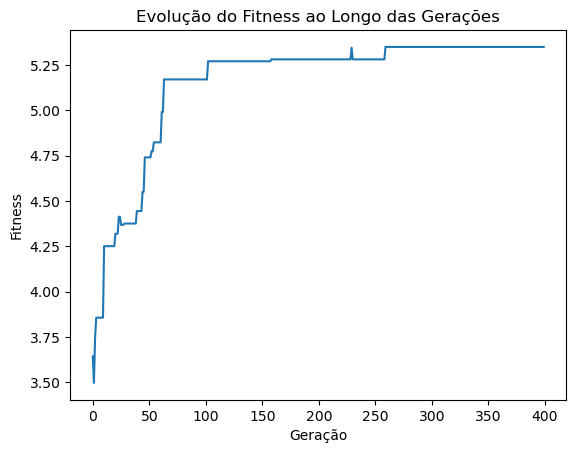

Acuracia: 0.9995886001059838


In [75]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=3, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 64.61302995681763
Melhor aptidão: 5.352216092317168
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'bpm', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'ft_per_g']
Geração: 250


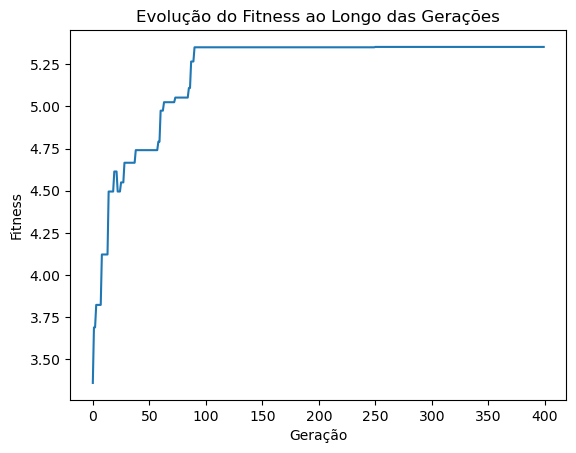

Acuracia: 1.0000000000000002


In [76]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=4, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 65.25567293167114
Melhor aptidão: 5.322525946889612
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'bpm', 'ows', 'pts_per_g', 'fg_per_g', 'ft_per_g', 'fta_per_g']
Geração: 213


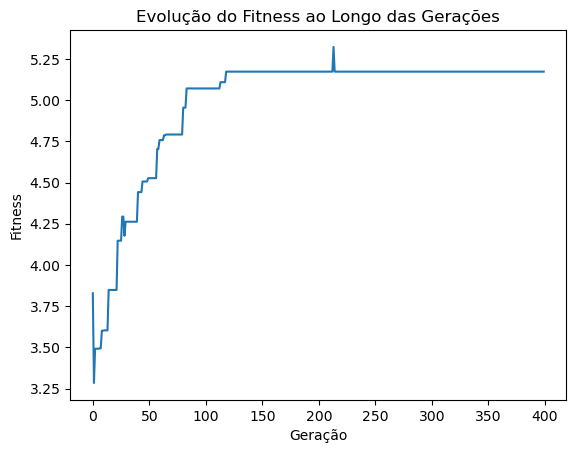

Acuracia: 0.9944527379097841


In [77]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=5, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 63.34575057029724
Melhor aptidão: 5.074693246163779
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'obpm', 'ows', 'pts_per_g', 'ft_per_g', 'fta_per_g', 'usg_pct']
Geração: 189


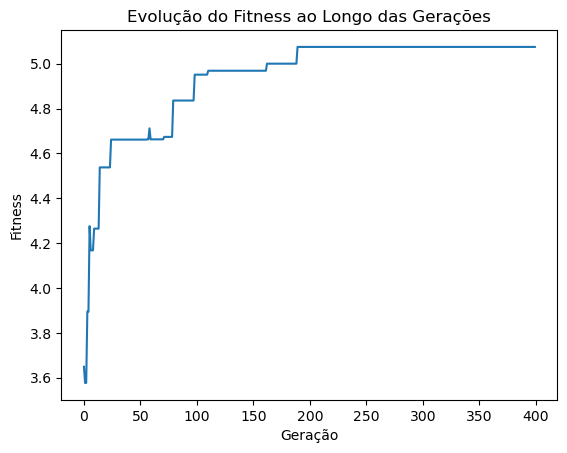

Acuracia: 0.9481480490760159


In [78]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=6, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))

Tempo de execução: 64.65949392318726
Melhor aptidão: 5.3500141911840355
Melhores atributos:
['vorp', 'ws', 'per', 'ws_per_48', 'bpm', 'obpm', 'ows', 'pts_per_g', 'fg_per_g', 'fta_per_g']
Geração: 183


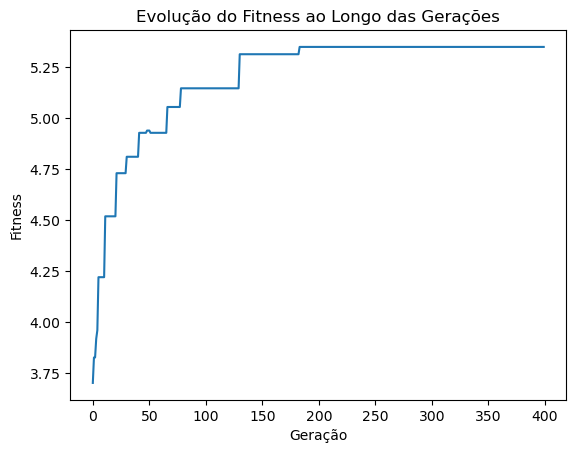

Acuracia: 0.9995886001059838


In [79]:
combinacao, resultado_atual = alg_genetico(candidatos_geral, plot_details=True, num_crossover_points=10, best_result=melhor_resultado_geral)
print("Acuracia:", (resultado_atual/melhor_resultado_geral))